In [80]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from pathlib import Path
from os.path import join
sns.set()
sns.set_palette('colorblind');

/data/logs/2018-03-23-1725-partcontrol-bigmodel/bigmodel_mlp_nolim_vara/run_2/rep00/logall_20999.txt


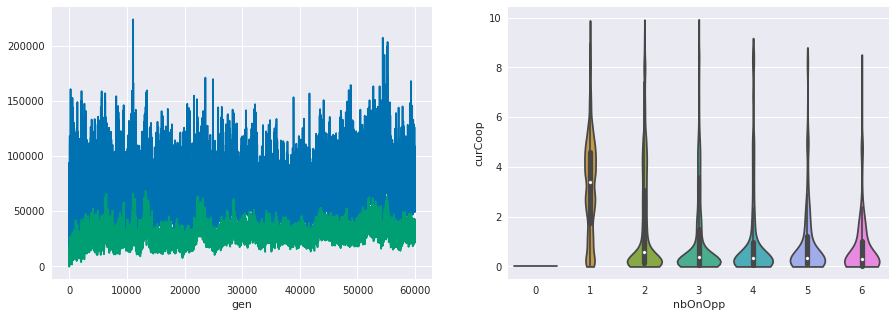

3.284248398190781


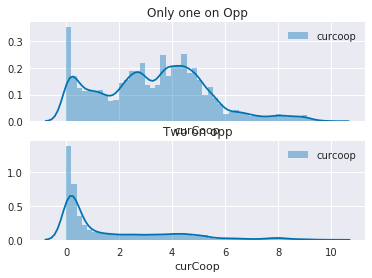

1.7464482833412005


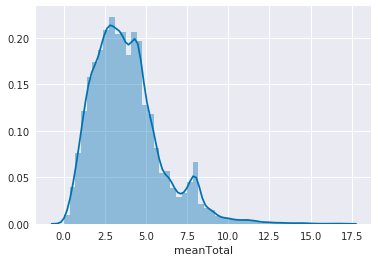

/data/logs/2018-03-23-1725-partcontrol-bigmodel/bigmodel_mlp_nolim_vara/run_2/rep00/logall_34999.txt


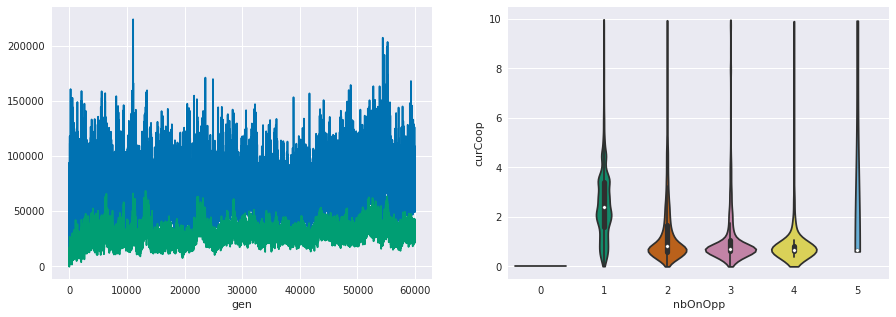

2.6167351617214663


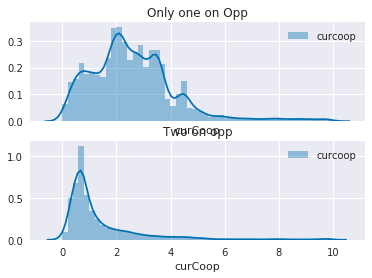

1.437961003744032


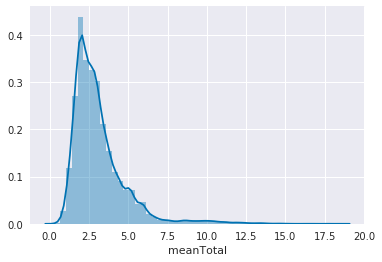

/data/logs/2018-03-23-1725-partcontrol-bigmodel/bigmodel_mlp_nolim_vara/run_1/rep00/logall_20999.txt


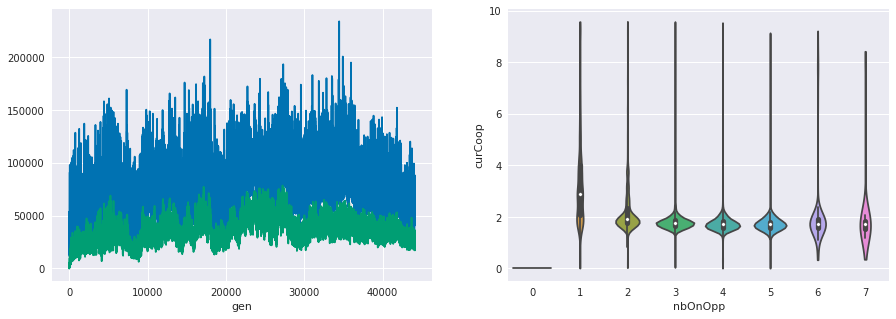

3.3447828920858025


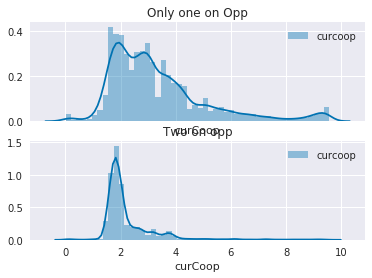

2.262446003581563


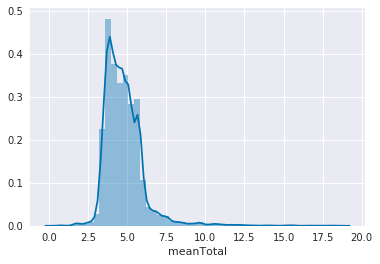

/data/logs/2018-03-23-1725-partcontrol-bigmodel/bigmodel_mlp_nolim_vara/run_1/rep00/logall_34999.txt


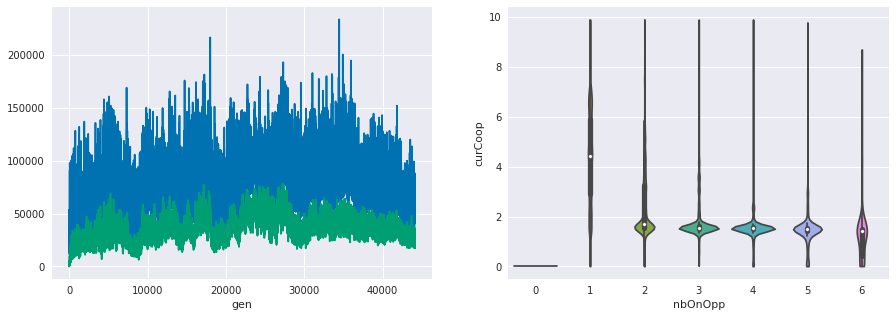

4.343412702350557


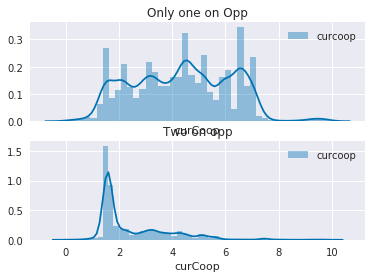

2.5126832231884375


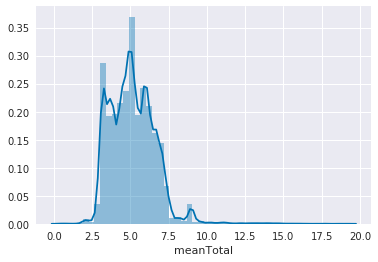

/data/logs/2018-03-23-1725-partcontrol-bigmodel/bigmodel_mlp_nolim_vara/run_3/rep00/logall_20999.txt


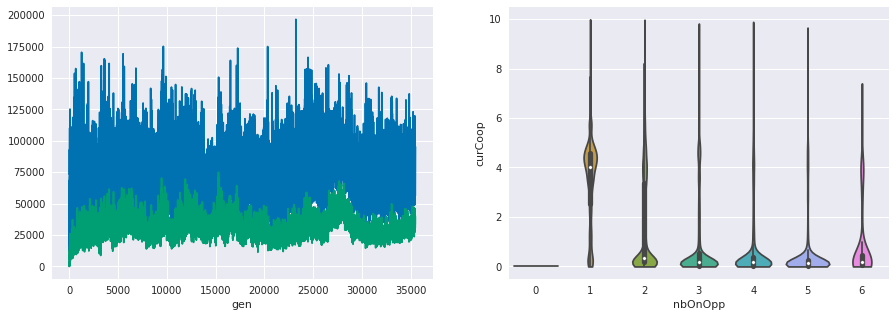

3.5359951240851597


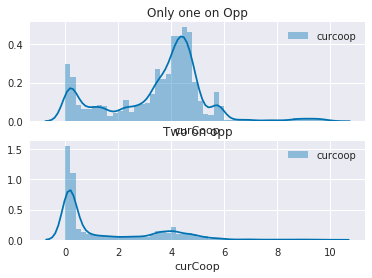

1.5660529134567647


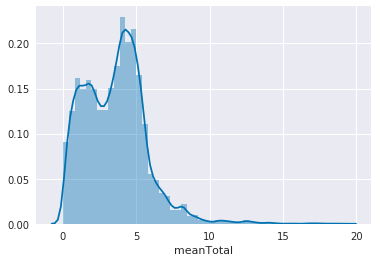

/data/logs/2018-03-23-1725-partcontrol-bigmodel/bigmodel_mlp_nolim_vara/run_3/rep00/logall_34999.txt


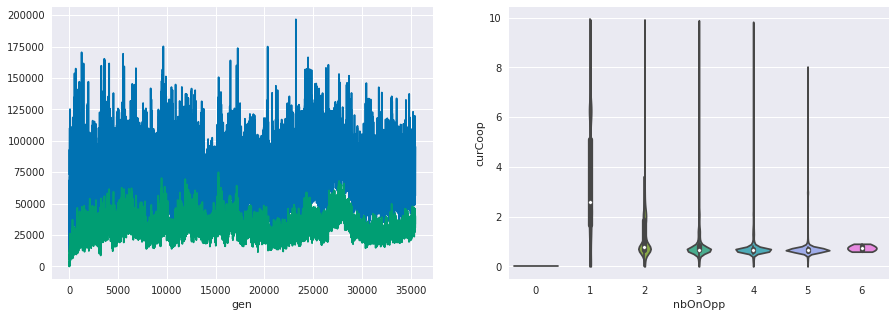

3.2175950031753655


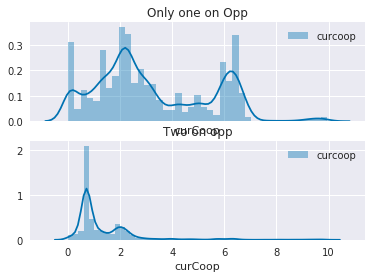

1.3784782747424194


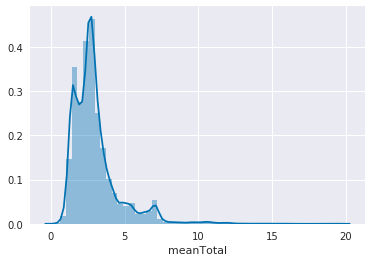

/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim_vara/run_2/rep00/logall_20999.txt


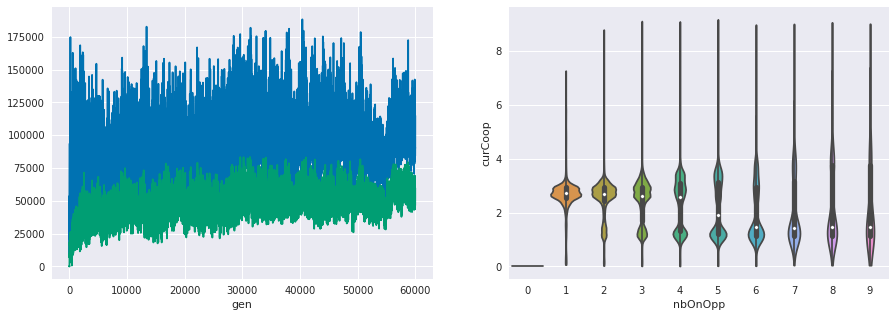

2.6864383584631137


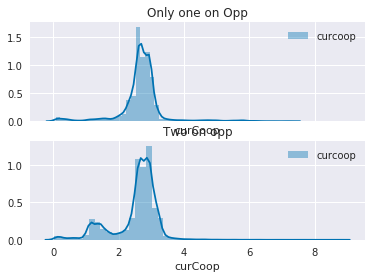

2.518357744029071


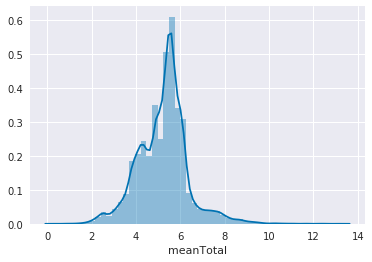

/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim_vara/run_2/rep00/logall_34999.txt


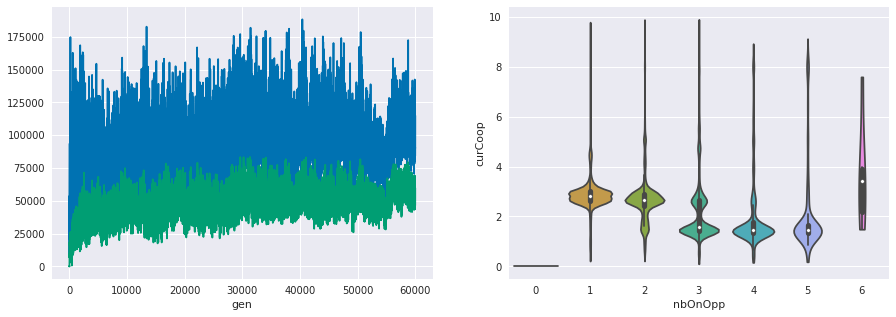

2.90879698617219


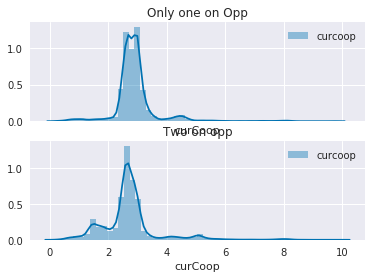

2.7010803015085765


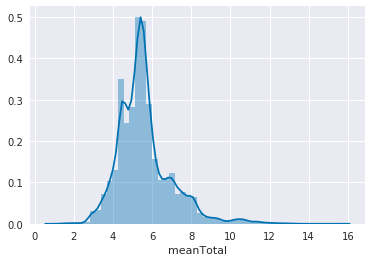

/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim_vara/run_1/rep00/logall_20999.txt


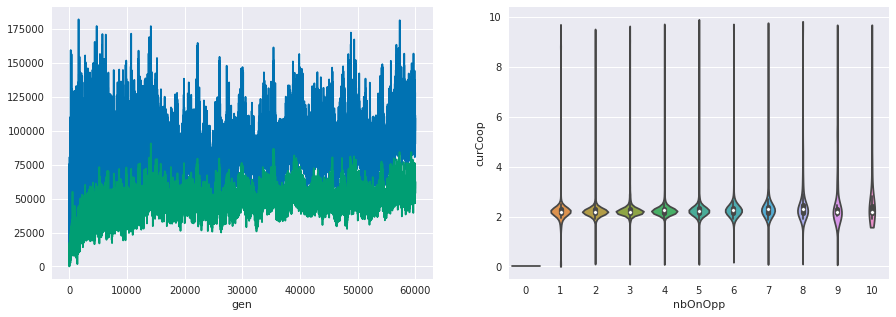

2.288871341205351


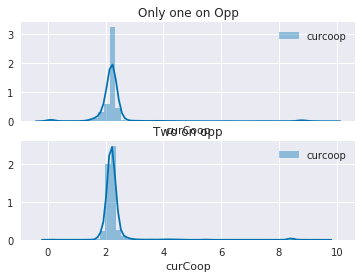

2.2961109292274653


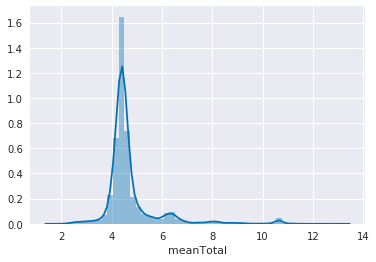

/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim_vara/run_1/rep00/logall_34999.txt


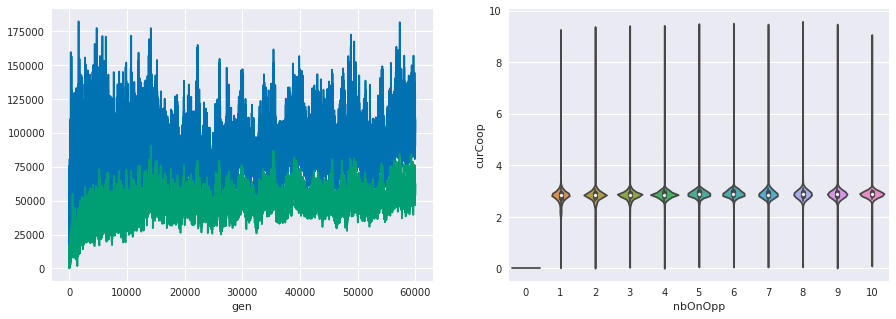

2.8829517271424425


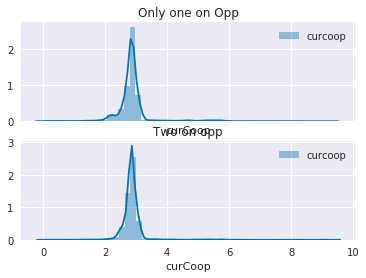

2.8801172778810233


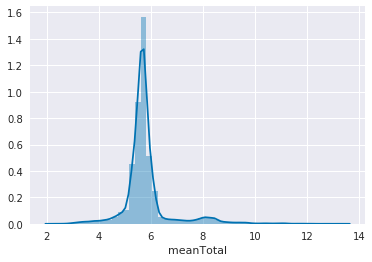

/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim_vara/run_3/rep00/logall_20999.txt


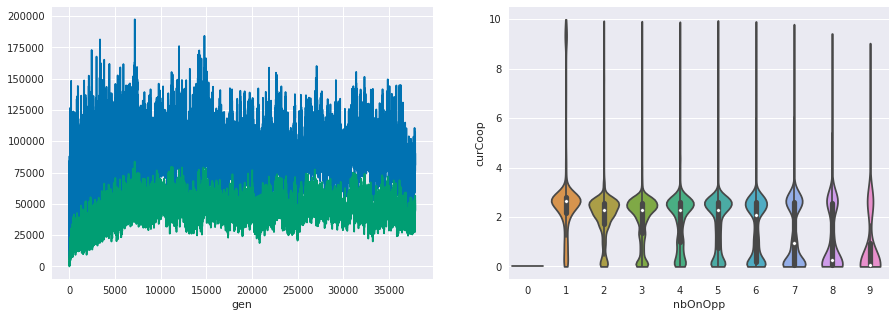

2.7445941414344937


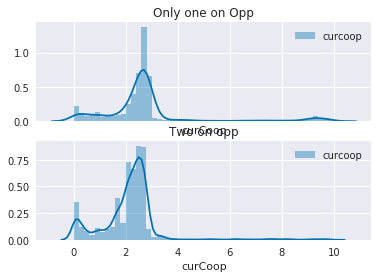

2.131677582557598


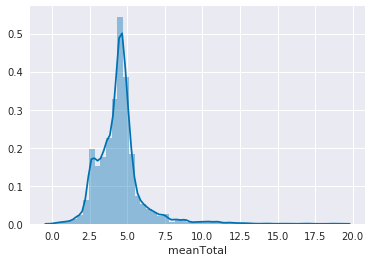

/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim_vara/run_3/rep00/logall_34999.txt


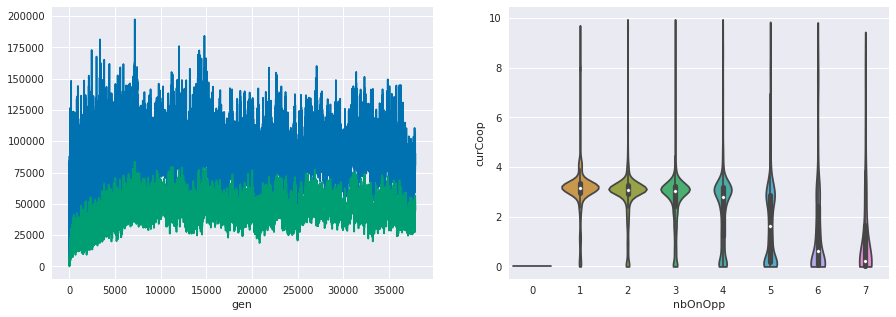

3.1494356916289976


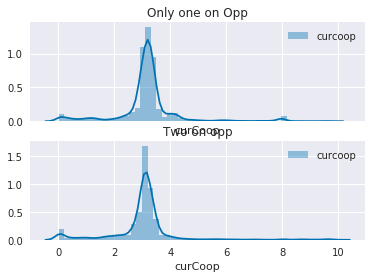

2.9867068109304857


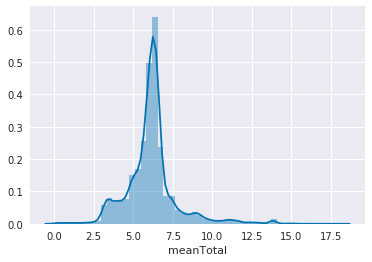

In [112]:
subcond = 'bigmodel_mlp_nolim_vara'

conds = [f'/data/logs/2018-03-23-1725-partcontrol-bigmodel/{subcond}/run_2/rep00/',
         f'/data/logs/2018-03-23-1725-partcontrol-bigmodel/{subcond}/run_1/rep00/',
         f'/data/logs/2018-03-23-1725-partcontrol-bigmodel/{subcond}/run_3/rep00/',
         f'/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/{subcond}/run_2/rep00/',
         f'/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/{subcond}/run_1/rep00/',
         f'/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/{subcond}/run_3/rep00/']

for cond in conds:
    for gen in [20999, 34999]:
        logfile = join(cond, f'logall_{gen}.txt')
        print(logfile)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        fitpath = Path(cond) / "fitnesslog.txt"
        fit = pd.read_csv(fitpath, delimiter="\t")
        fit.groupby('gen')['fitness'].max().plot(ax=ax1)
        fit.groupby('gen')['fitness'].median().plot(ax=ax1)

        i = 0
        ok = True
        to_format = '{' in logfile
        logs = []
        while ok:
            try:
                dat = pd.read_csv(logfile.format(i), delimiter="\t")
                dat["eval"] = i
                logs.append(dat)
            except:
                ok = False
            else:
                i += 1
                ok = to_format
        try:
            log = pd.concat(logs)
        except Exception:
            plt.show(fig)
            print("no data, continue")
            continue

        sns.violinplot(data=log, x='nbOnOpp', y='curCoop', cut=0, ax=ax2)
        
        plt.show(fig)

        on_opp = log.query('onOpp == 1 and nbOnOpp == 1')
        fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
        ax = ax1
        sns.distplot(on_opp['curCoop'], label="curcoop", ax=ax)
        #sns.distplot(on_opp['a']/on_opp['nbOnOpp'], label="ess")
        print(on_opp['curCoop'].mean())
        ax.set_title('Only one on Opp')
        ax.legend()

        ax = ax2
        on_opp = log.query('onOpp == 1 and nbOnOpp == 2')
        sns.distplot(on_opp['curCoop'], label="curcoop", ax=ax)
        #sns.distplot(on_opp['a'], label="ess")
        ax.legend()
        ax.set_title('Two on opp')
        plt.show(fig)
        print(on_opp['curCoop'].mean())
        
        fig, ax = plt.subplots()
        sns.distplot(on_opp['meanTotal'], ax=ax)
        plt.show(fig)


In [72]:
print(scipy.stats.normaltest(on_opp['curCoop']))
print(scipy.stats.normaltest(on_opp['a']))

NormaltestResult(statistic=127855.44682959723, pvalue=0.0)
NormaltestResult(statistic=1.0000666784448706, pvalue=0.6065104387891324)


Not normal, so wilcoxon

In [116]:
scipy.stats.wilcoxon(on_opp['curCoop'], on_opp['a']/on_opp['nbOnOpp'])

WilcoxonResult(statistic=228862173.5, pvalue=0.0)

In [117]:
on_opp['curCoop'].median(), (on_opp['a']/on_opp['nbOnOpp']).median()

(0.814551, 2.5)

LinAlgError: singular matrix

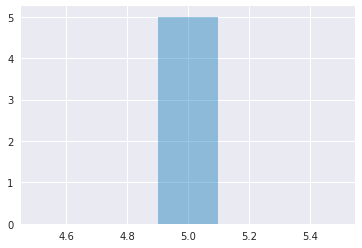

In [118]:
sns.distplot(log.groupby('id').mean()['a'])

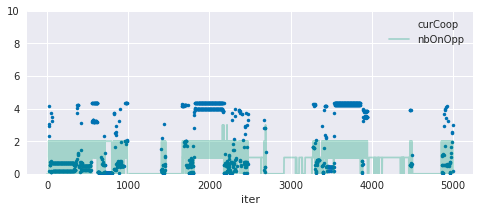

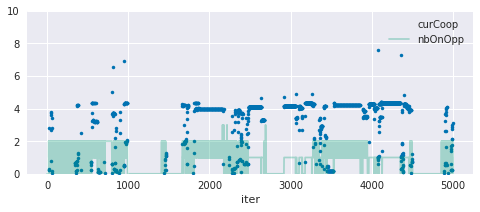

In [119]:
beg = 0
end = 5000
ind = 4
fig = plt.figure(figsize=(8,3))
ax = fig.gca()
nlog = log.copy()
nlog['curCoop'] = np.where(nlog['nbOnOpp'] == 2, nlog['curCoop'], np.nan)
nlog.query('id == {}'.format(ind)).plot(x='iter', y='curCoop', ax=ax, style='.')
nlog.query('id == {}'.format(ind)).plot(alpha=0.3, x='iter', y='nbOnOpp', ax=ax)
ax.set_ylim(0, 10)

fig = plt.figure(figsize=(8,3))
ax = fig.gca()
nlog = log.copy()
nlog['curCoop'] = np.where(nlog['nbOnOpp'] == 1, nlog['curCoop'], np.nan)
nlog.query('id == {}'.format(ind)).plot(x='iter', y='curCoop', ax=ax, style='.')
nlog.query('id == {}'.format(ind)).plot(alpha=0.3, x='iter', y='nbOnOpp', ax=ax)
ax.set_ylim(0, 10);

In [120]:
%%script false 
c = 1
defforgive = 0
forgive = defforgive
log['step'] = np.nan
for e in log['eval'].unique():
    for j in log['id'].unique():
        for i, elem in log.query(f'id == {j} and eval == {e}').iterrows():
            if elem['onOpp'] == 1:
                if elem['nbOnOpp'] >= 2:
                    log.at[i, 'step'] = c
                    c += 1
                    forgive = defforgive
                else:
                    forgive -= 1
                    if forgive > 0 and c > 1:
                        log.at[i, 'step'] = c
                        c += 1
                        print("forgiven")
                    else:
                        c = 1
                        forgive = defforgive
            else:
                c = 1
                forgive = defforgive
        c=1
        forgive = defforgive

In [121]:
log.query('id == 2 and step >= 1')

UndefinedVariableError: name 'step' is not defined

UndefinedVariableError: name 'step' is not defined

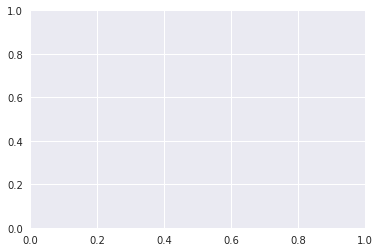

In [122]:
fig = plt.figure()
ax = fig.gca()
sns.distplot(log.query('step > 40 and nbOnOpp == 2')['curCoop'], ax=ax)
ax.set_xlim(0, 10)

fig = plt.figure()
ax = fig.gca()
sns.distplot(log.query('step >= 0 and nbOnOpp == 2')['curCoop'], ax=ax)
ax.set_xlim(0, 10)


In [123]:
log.groupby('step').mean().plot(y='curCoop')

KeyError: 'step'

In [124]:
log.query('curCoop > 3 and nbOnOpp == 2')

,eval,iter,id,a,onOpp,nbOnOpp,curCoop,meanOwn,meanTotal
71,0,2,11,5,1,2,3.68894,3.68894,5.95212
282,0,9,12,5,1,2,3.68539,1.34244,2.22060
342,0,11,12,5,1,2,3.75835,1.59844,2.34645
354,0,11,24,5,1,2,3.66396,3.66608,3.72233
402,0,13,12,5,1,2,3.76519,1.89720,2.29616
421,0,14,1,5,1,2,3.57892,3.65033,4.04170
541,0,18,1,5,1,2,3.32791,2.68972,3.00850
551,0,18,11,5,1,2,3.62482,2.28805,3.08616
570,0,19,0,5,1,2,3.25518,3.25377,3.66795
574,0,19,4,5,1,2,4.14180,4.14180,7.39698


/home/pecoffet/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


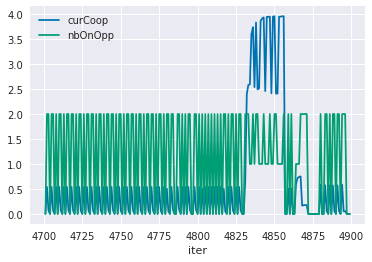

In [125]:
log.query(f'eval == 0 and 4700 < iter < 4900 and id == 27').plot(x='iter', y=['curCoop', 'nbOnOpp'])


In [126]:
def p(invest, totalInvest, a, n):
    b = 1
    return (a * totalInvest + b * (totalInvest - invest)) / n - 0.5 * invest * invest

1.8547575732913593

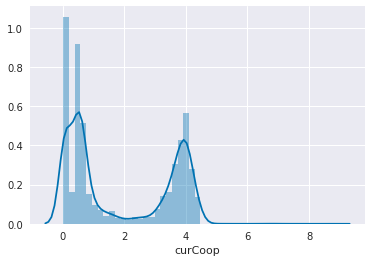

In [127]:
curcoop = log.query('nbOnOpp == 2')['curCoop']
meantot = log.query('nbOnOpp == 2')['meanTotal']
a = log.query('nbOnOpp == 2')['a']
n = log.query('nbOnOpp == 2')['nbOnOpp']
sns.distplot(curcoop)
curcoop.mean()

In [131]:
cur = p(curcoop, meantot, a, n).sum()
cur

318757.27686213556

In [132]:
opti = p(a/n, meantot - curcoop + a/n, a, n).sum()
opti

392941.1407886001

In [133]:
(cur - opti) / opti

-0.18879128761519776